<a href="https://colab.research.google.com/github/mishra-amit-300266/ML-Engineer-Roadmap/blob/main/Week2_ML/Day6_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


In [3]:
data_set = pd.read_csv('Salary Data.csv')

In [4]:
print("Data Shape", data_set.shape)

data_set.info()

Data Shape (375, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
data_set.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [17]:
data_set.dropna(inplace = True)

In [18]:
data_set.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


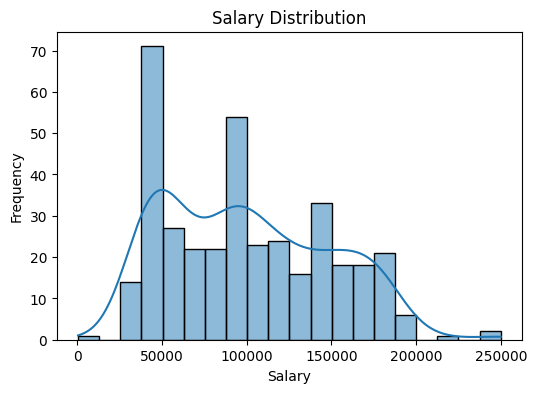

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(data_set['Salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

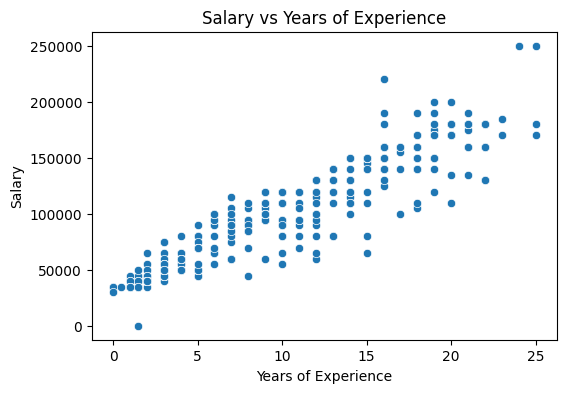

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_set, x='Years of Experience', y='Salary')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

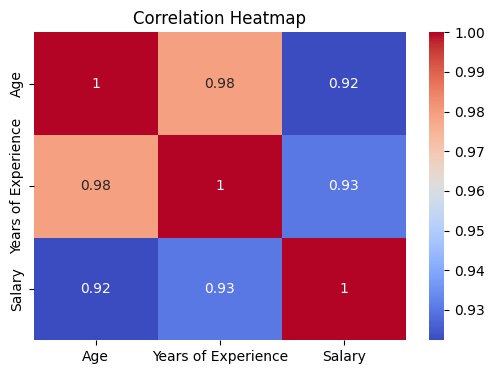

In [16]:
plt.figure(figsize=(6,4))
corr = data_set.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
le = LabelEncoder()
data_set['Gender'] = le.fit_transform(data_set['Gender'])
data_set['Education Level'] = le.fit_transform(data_set['Education Level'])
data_set['Job Title'] = le.fit_transform(data_set['Job Title'])

In [23]:
X = data_set.drop('Salary', axis = 1)
y = data_set['Salary']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 249075656.42722148
R² Score: 0.8961138207821864


In [29]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

       Actual      Predicted
329  180000.0  167633.686952
33    65000.0   93362.332154
15   125000.0  130879.623800
316   80000.0   84293.364421
57   140000.0  161044.594338


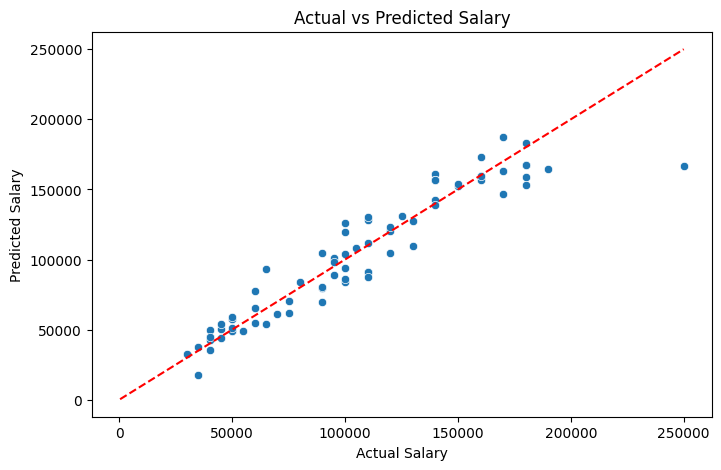

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()